# Logistic Regression with Python

We will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [82]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sb

In [83]:
# Read the Dataset

dataframe = pd.read_csv("/Users/devangpapinwar/Downloads/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/advertising.csv")

In [84]:
# Get Dataframe info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [85]:
# Gets the first 5 sets of the dataframe
dataframe.head()
dataframe.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [86]:
# Check for Null values
dataframe.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


# Performing Data Analysis

<AxesSubplot:>

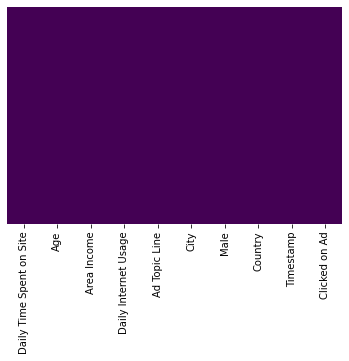

In [87]:
# Checking if there are any Null values : Visualised 
sb.heatmap(dataframe.isnull() , yticklabels= False , cbar= False , cmap= "viridis")

In [88]:
dataframe.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


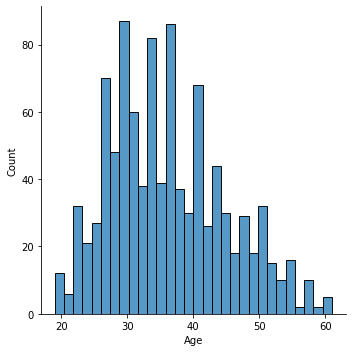

In [89]:
# Age of the People
sb.displot(dataframe["Age"] , kde = False , bins = 30)

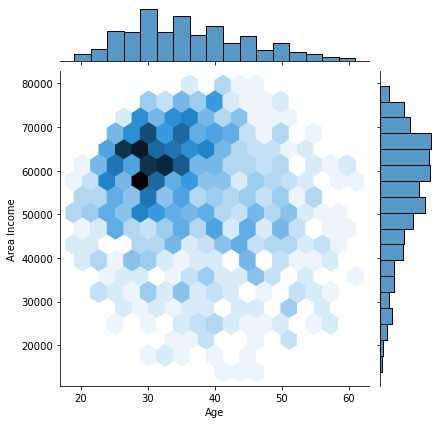

In [90]:
# Relation between the Age of the People and the Area Income
sb.jointplot(x="Age" , y="Area Income" ,kind="hex" , data=dataframe)

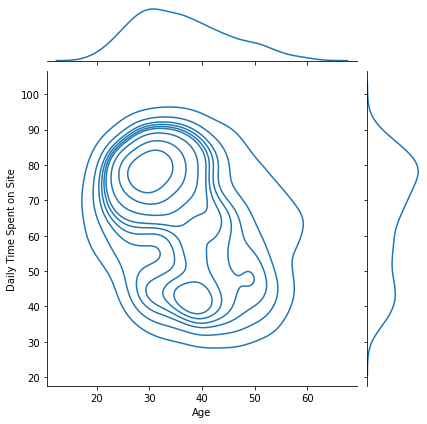

In [91]:
# Relation between the Age of the People and the Daily Time Spent on Site
sb.jointplot(x="Age" , y="Daily Time Spent on Site" ,kind="kde" , data= dataframe)

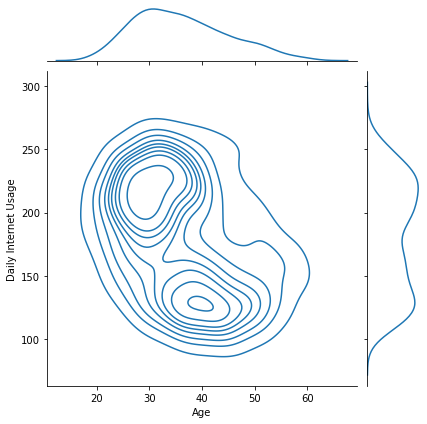

In [92]:
# Relation between the Age of the People and their Daily Internet Usage
sb.jointplot(x="Age" , y="Daily Internet Usage" ,kind="kde" , data= dataframe)

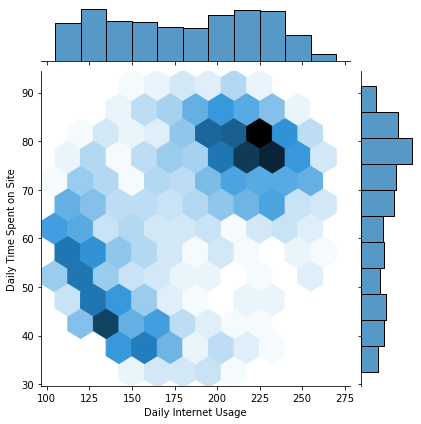

In [93]:
# Relationship between the Daily Internet Usage and Daily Time Spent on Site
sb.jointplot(x="Daily Internet Usage" , y="Daily Time Spent on Site" ,kind="hex" , data= dataframe)

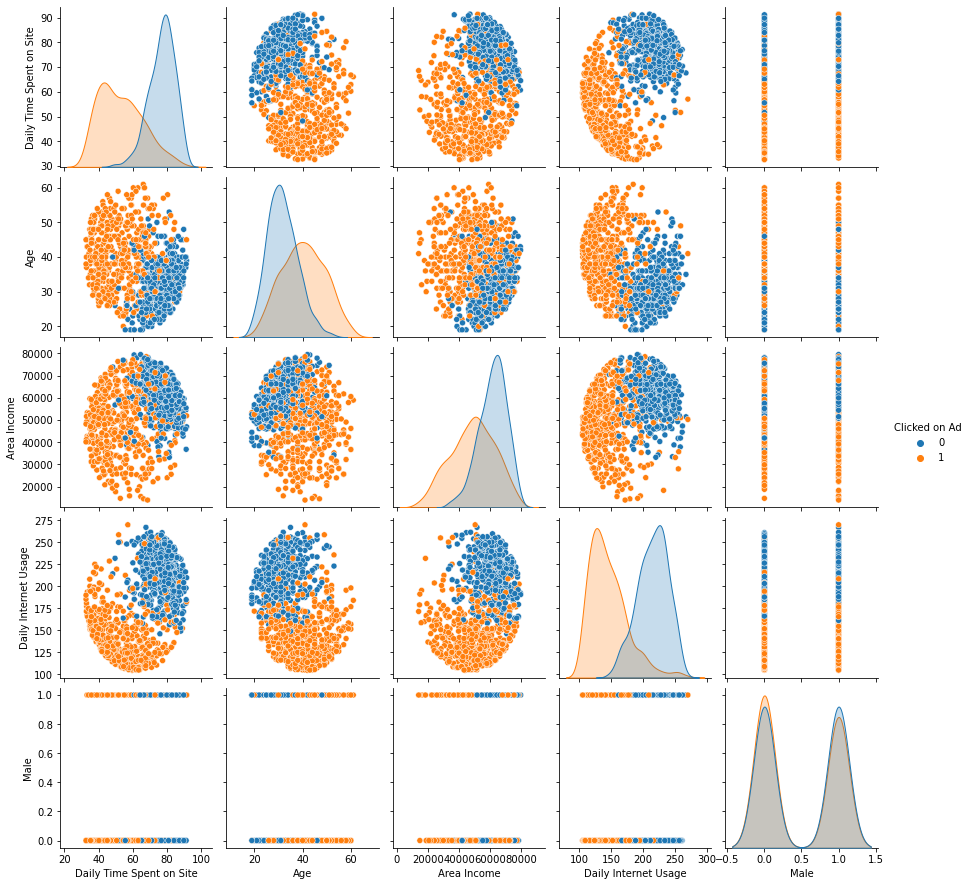

In [94]:
# Pairwise Relationships of the Numerical data present in the Dataframe
sb.pairplot(dataframe , hue="Clicked on Ad")

# Logistic Regression

In [95]:
# Split the Data into the Numerical Data we have to use to predict the amount of people that clicked on Ad
X = dataframe[["Daily Time Spent on Site","Age" ,"Area Income","Daily Internet Usage","Male"]]
y = dataframe["Clicked on Ad"]

In [96]:
# Split the Data into the Training Data and the Testing Data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 101)

In [97]:
# Instantiate the Logistic Regression and then fit the training data to predict the test data
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(X_train , y_train)

predictions = regression.predict(X_test)

In [98]:
# Generate the Classification Report of the model
from sklearn.metrics import classification_report

print("Classification Report : \n", classification_report(y_test , predictions))

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [99]:
# Generate the Confusion Matrix of the model
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n" , confusion_matrix(y_test , predictions))

Confusion Matrix : 
 [[149   8]
 [ 14 129]]


In [100]:
# Split the Data into the Numerical Data we have to use to predict the amount of people that clicked on Ad
X = dataframe[["Daily Time Spent on Site","Age","Daily Internet Usage"]]
y = dataframe["Clicked on Ad"]

In [101]:
# Split the Data into the Training Data and the Testing Data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 101)

In [102]:
# Instantiate the Logistic Regression and then fit the training data to predict the test data
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
regression.fit(X_train , y_train)

predictions = regression.predict(X_test)

In [103]:
# Generate the Classification Report of the model
from sklearn.metrics import classification_report

print("Classification Report : \n", classification_report(y_test , predictions))

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       157
           1       0.97      0.94      0.95       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [104]:
# Generate the Confusion Matrix of the model
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n" , confusion_matrix(y_test , predictions))

Confusion Matrix : 
 [[153   4]
 [  9 134]]
